In [1]:
# Load in libraries (Use the h5ad's from James)
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

In [2]:
adata = sc.read_h5ad("../../Cerebellum/Human/4_lognormalization_and_clustering.h5ad")

In [3]:
adata = adata[~adata.obs.specimen.isin(['M1','M5','M6','M7'])]
adata = adata[~adata.obs["leiden_res_0.70"].isin(['6','7','8','9'])]

In [4]:
#sc.pl.umap(adata,color=['Age'],save='umaps_human.pdf')

In [5]:
CB = adata[adata.obs.Region == 'CB']

In [6]:
gene_list = "AXL, CD9, CSF1R, HIF1A, ITGAX, TMEM163, APOE, CYBB, LILR4B, LGALS3".split(", ")
sc.tl.score_genes(CB, gene_list, score_name="Neuroprotective Act A/B")

gene_list = "CDK2, CXCL2, SLAMF9, ARHGAP5, CTSS, ATP2A3, HLA-A".split(", ")
sc.tl.score_genes(CB, gene_list, score_name="Neuron Associated")

gene_list = "SLC25A5, NPL, ANGPTL7, PDE2A, LDHB, CD63, SEPP1, SDCBP, ADIPOR1, RBBP4, CNDP2, HSD17B4, HSD17B4, GPD11, DAZAP2, HNMPK, RAPSN, CAT, KL, NAMPT, ACSL1, DPYD, CD163".split(", ")
sc.tl.score_genes(CB, gene_list, score_name="LD Associated")

/home/doug.henze/.conda/envs/Vizgen_2/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


In [7]:
sc.pp.pca(CB)
sc.external.pp.harmony_integrate(CB, key="specimen")
sc.pp.neighbors(CB, n_neighbors=15, use_rep="X_pca_harmony")
sc.tl.umap(CB)

2025-04-21 17:23:21,834 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-04-21 17:23:23,128 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-04-21 17:23:23,138 - harmonypy - INFO - Iteration 1 of 10
2025-04-21 17:23:23,215 - harmonypy - INFO - Iteration 2 of 10
2025-04-21 17:23:23,291 - harmonypy - INFO - Converged after 2 iterations
/home/doug.henze/.conda/envs/Vizgen_2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-21 17:23:27.392927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-21 17:23:27.403872: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting t

In [8]:
import sklearn.ensemble
from sklearn.model_selection import train_test_split

model = sklearn.ensemble.RandomForestClassifier(class_weight="balanced")

for i in range(0, 20):
    key = "leiden_res_{}".format(i/20)
    sc.tl.leiden(CB, resolution=i/20, key_added=key)
    X_train, X_test, y_train, y_test = train_test_split(CB.X, CB.obs[key], test_size=0.5, random_state=42)
    model.fit(X_train, y_train)
    print(key, model.score(X_test, y_test))
    if model.score(X_test, y_test) < 0.7:
        break

/tmp/ipykernel_820494/947340642.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(CB, resolution=i/20, key_added=key)


leiden_res_0.0 1.0
leiden_res_0.05 1.0
leiden_res_0.1 0.9102296450939458
leiden_res_0.15 0.9081419624217119
leiden_res_0.2 0.9039665970772442
leiden_res_0.25 0.8893528183716075
leiden_res_0.3 0.7745302713987474
leiden_res_0.35 0.7223382045929019
leiden_res_0.4 0.6805845511482255


In [9]:
CB.layers['normalized'] = CB.X.copy()

  0%|          | 0/17 [00:00<?, ?it/s]

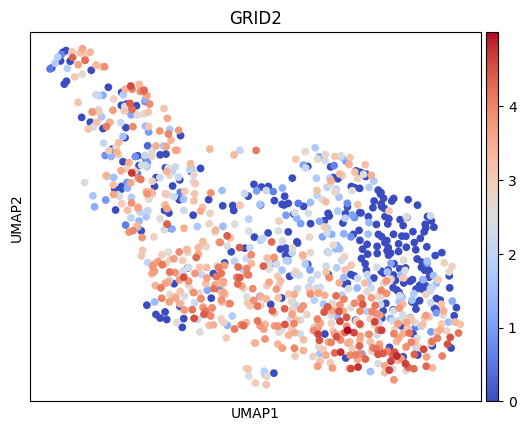

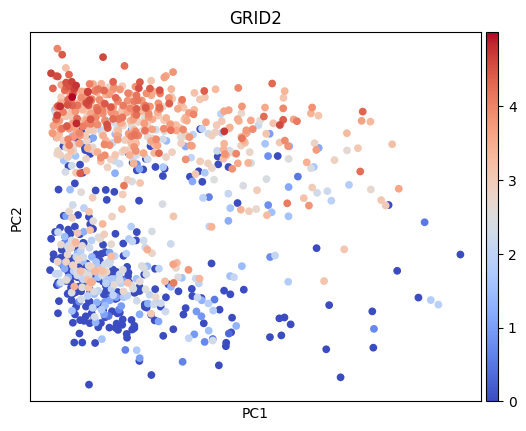

  6%|▌         | 1/17 [00:00<00:07,  2.24it/s]

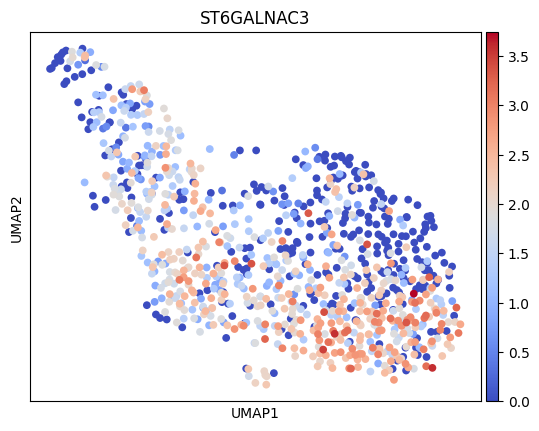

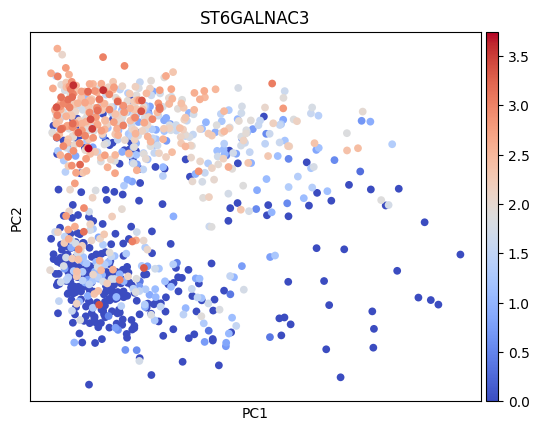

 12%|█▏        | 2/17 [00:00<00:05,  2.65it/s]

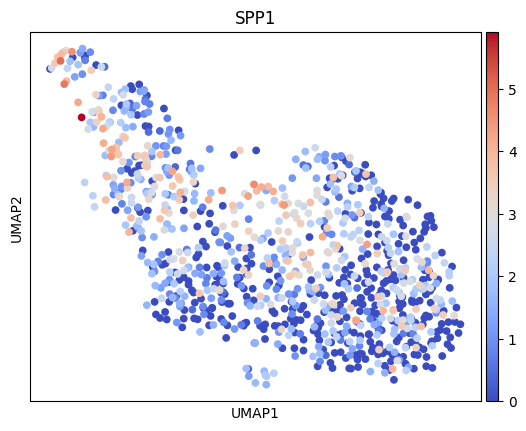

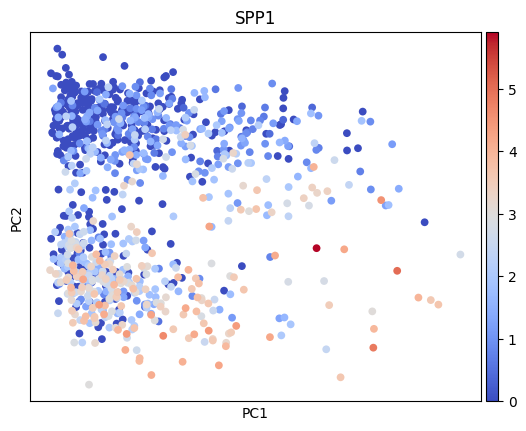

 18%|█▊        | 3/17 [00:01<00:04,  2.90it/s]

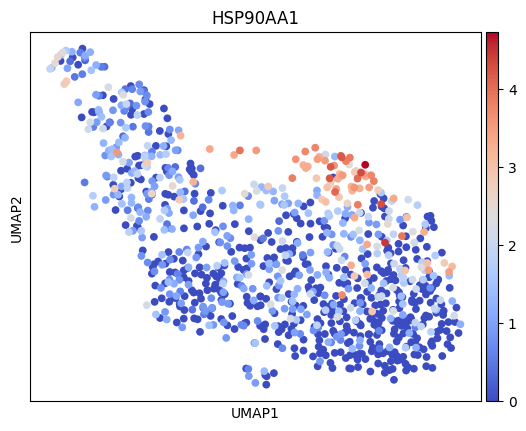

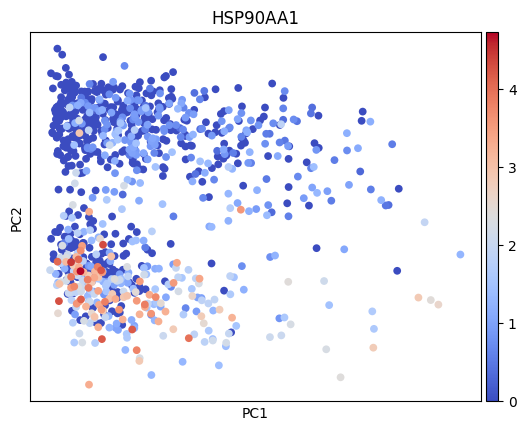

 24%|██▎       | 4/17 [00:01<00:04,  3.06it/s]

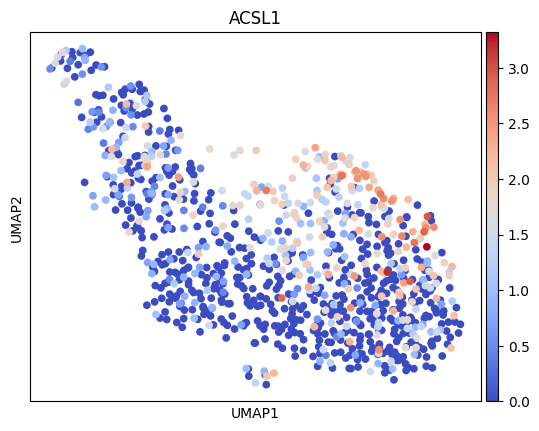

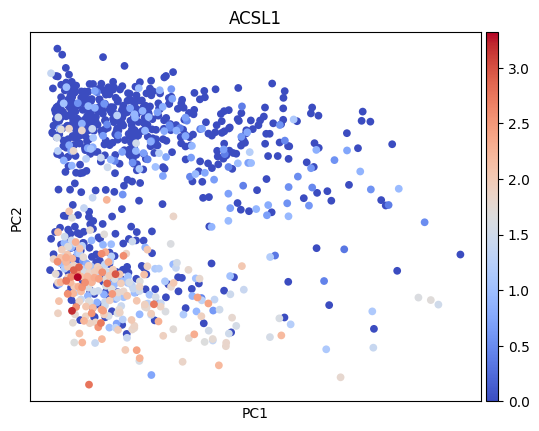

 29%|██▉       | 5/17 [00:01<00:03,  3.11it/s]

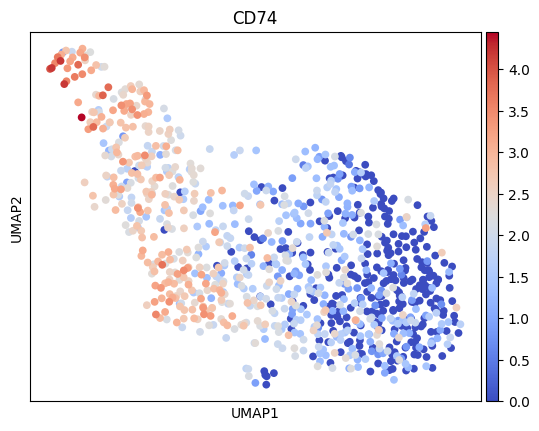

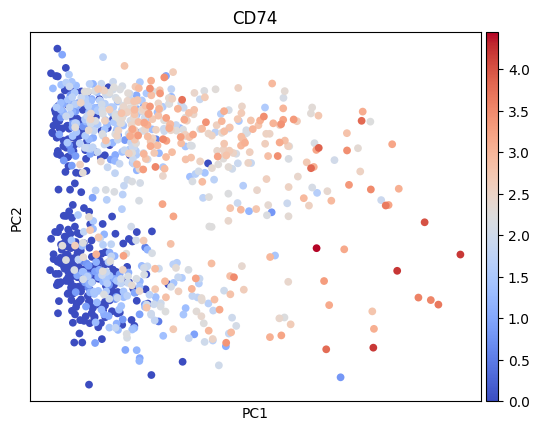

 35%|███▌      | 6/17 [00:02<00:03,  3.08it/s]

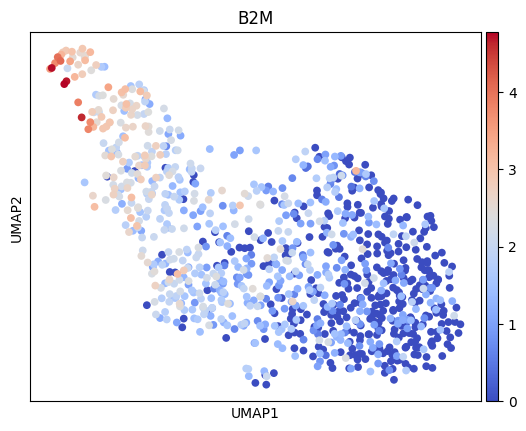

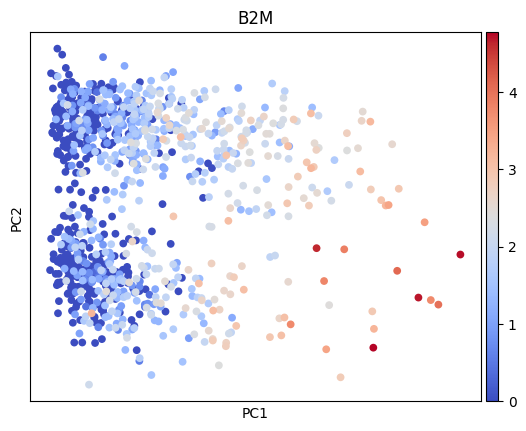

 41%|████      | 7/17 [00:02<00:03,  3.17it/s]

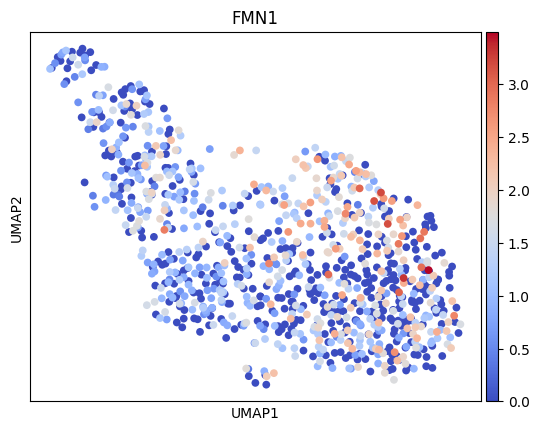

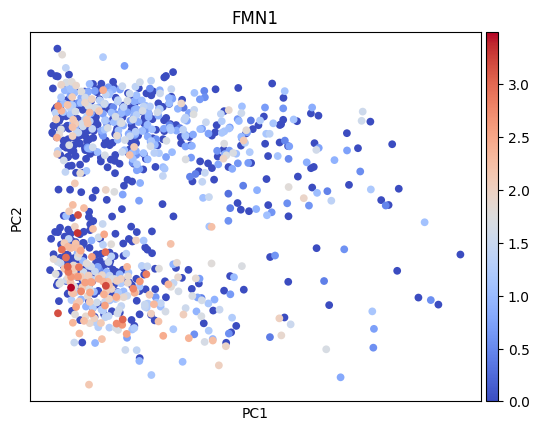

 47%|████▋     | 8/17 [00:02<00:02,  3.17it/s]

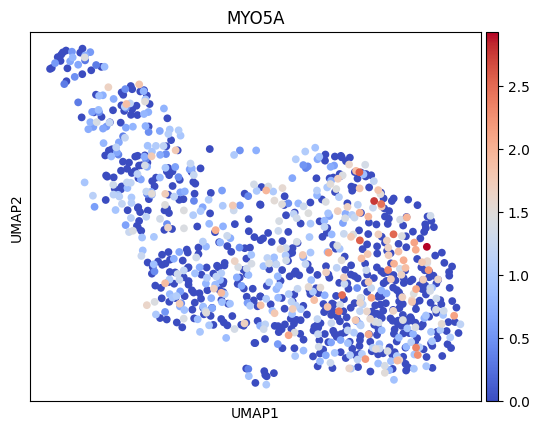

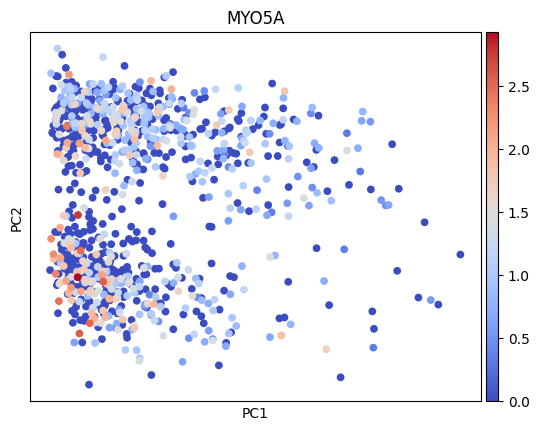

 53%|█████▎    | 9/17 [00:02<00:02,  3.20it/s]

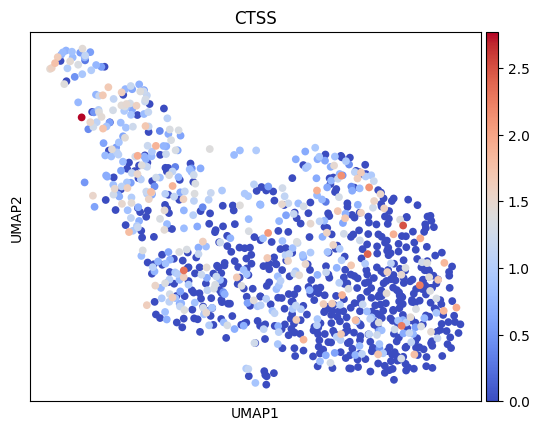

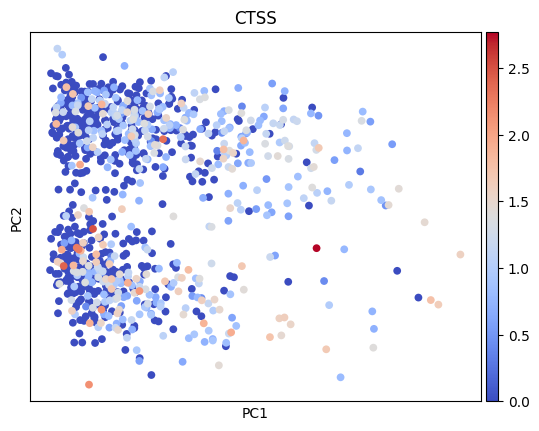

 59%|█████▉    | 10/17 [00:03<00:02,  3.23it/s]

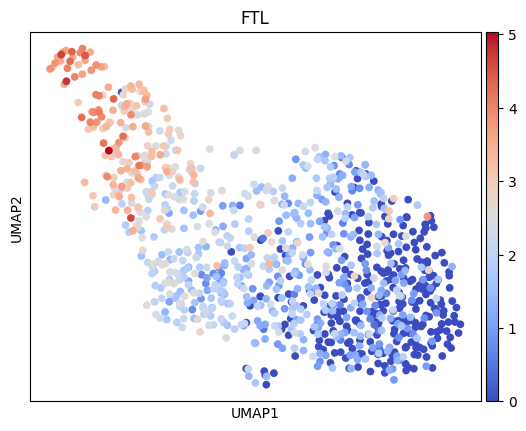

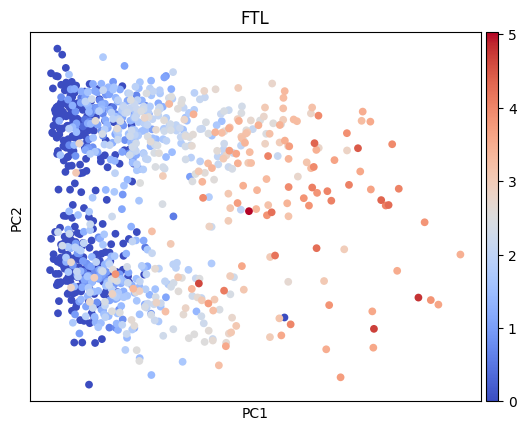

 65%|██████▍   | 11/17 [00:03<00:01,  3.24it/s]

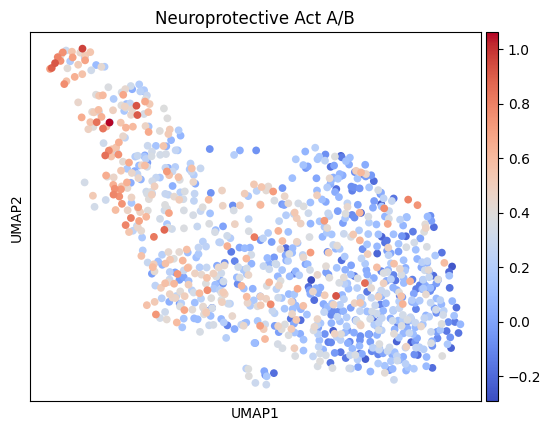

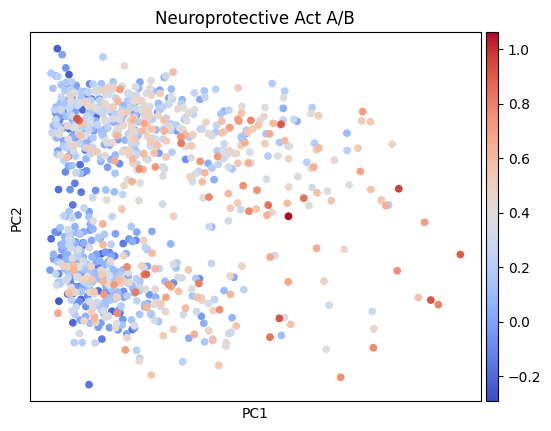

 71%|███████   | 12/17 [00:03<00:01,  3.20it/s]

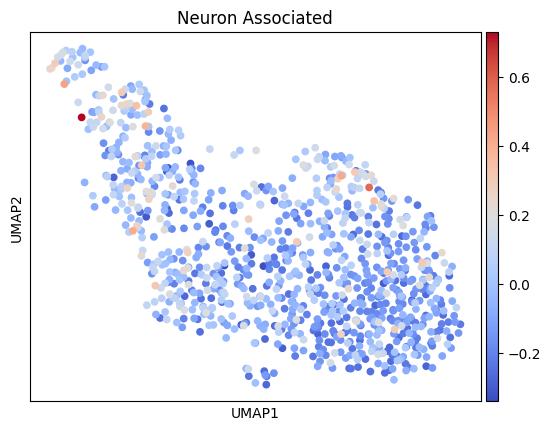

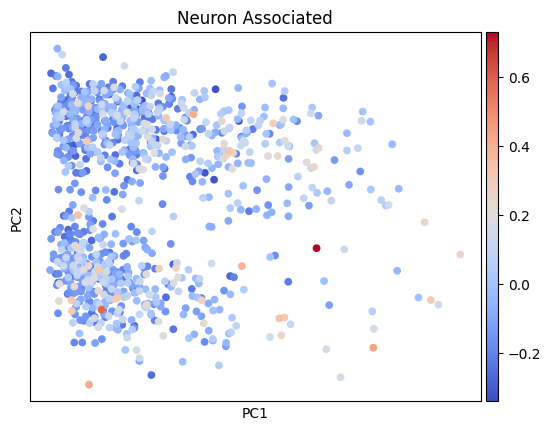

 76%|███████▋  | 13/17 [00:04<00:01,  3.23it/s]

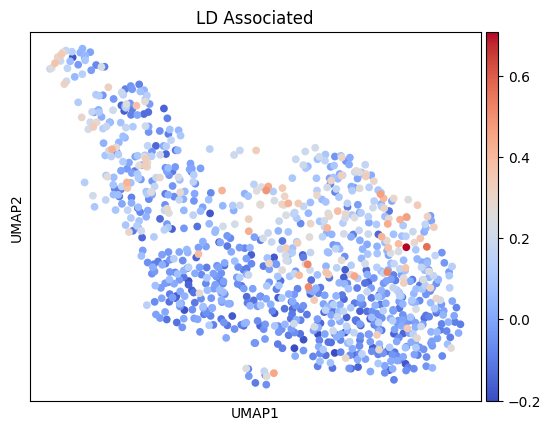

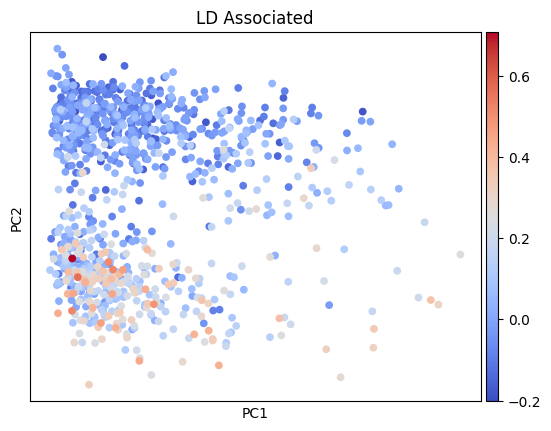

 82%|████████▏ | 14/17 [00:04<00:00,  3.26it/s]

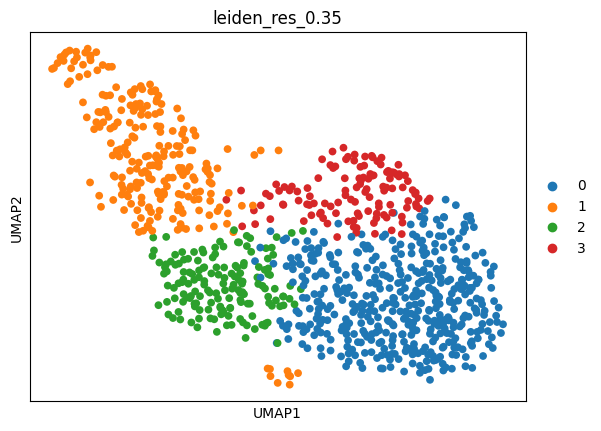

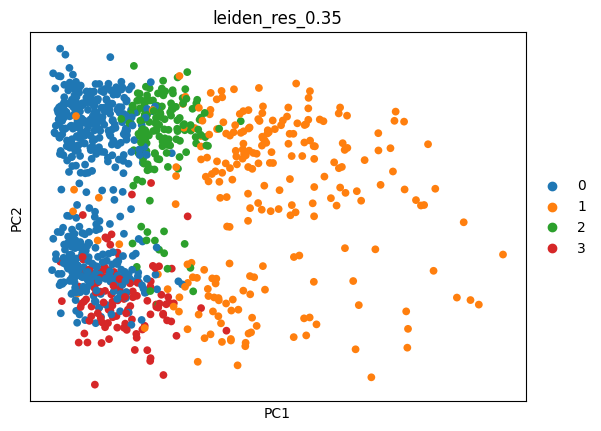

 88%|████████▊ | 15/17 [00:05<00:00,  2.38it/s]

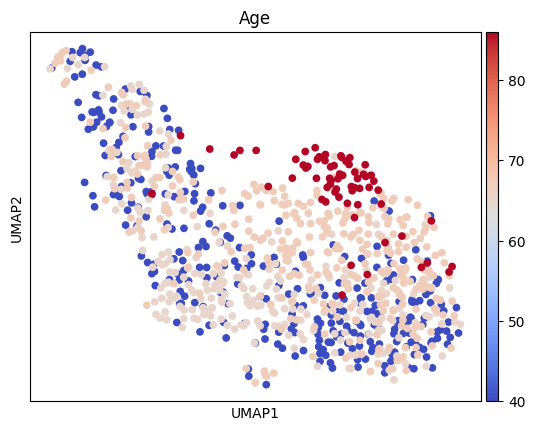

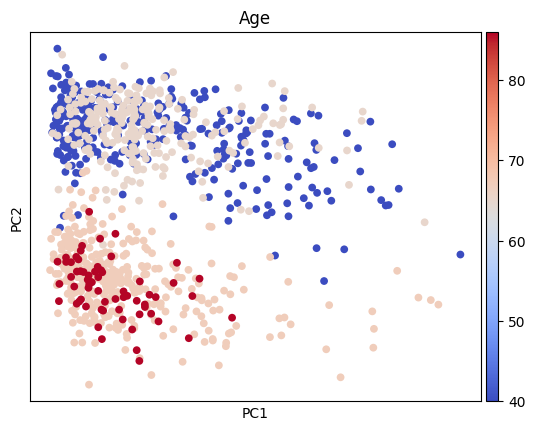

 94%|█████████▍| 16/17 [00:05<00:00,  2.64it/s]

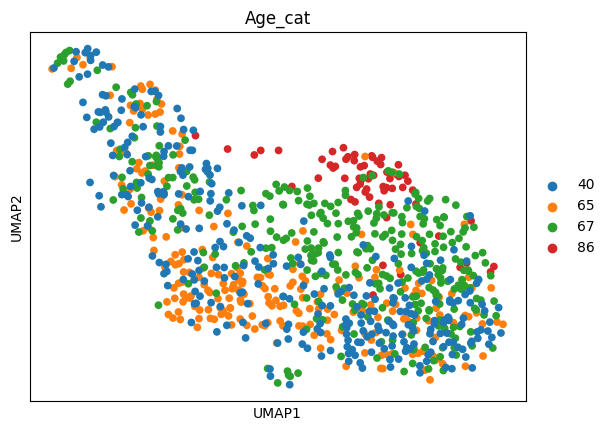

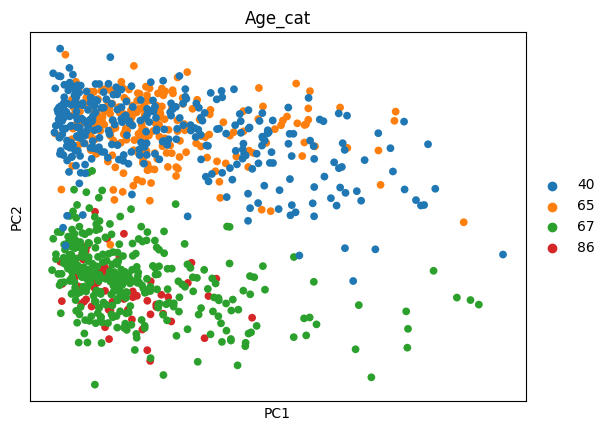

100%|██████████| 17/17 [00:05<00:00,  2.91it/s]


In [10]:
import pandas as pd
from tqdm import tqdm
CB.obs["Age_cat"] = pd.Categorical(CB.obs["Age"])

feature_list = [
    "GRID2",
    "ST6GALNAC3",
    "SPP1",
    "HSP90AA1",
    "ACSL1",
    "CD74",
    "B2M",
    "FMN1",
    "MYO5A",
    "CTSS",
    "FTL",
    "Neuroprotective Act A/B",
    "Neuron Associated",
    "LD Associated",
    "leiden_res_0.35",
    "Age",
    "Age_cat"
]

for feat in tqdm(feature_list):
    sc.pl.umap(CB, color=[feat], cmap="coolwarm", save = f"_{feat.replace('/', '-')}.pdf")
    sc.pl.pca(CB, color=[feat], cmap="coolwarm", save=f"_{feat.replace('/', '-')}.pdf")

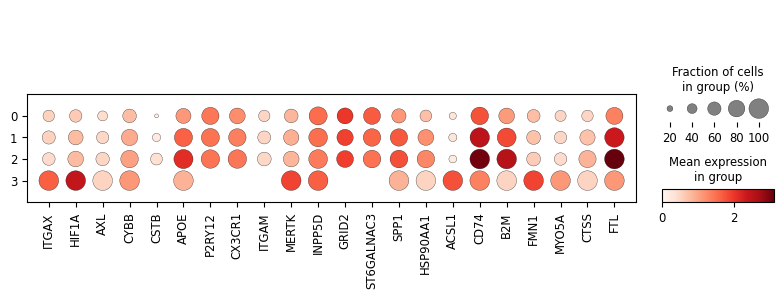

In [11]:
from pickle import BININT1
adata.var

sc.pl.dotplot(adata, var_names=[
    "ITGAX",
    # "CD83",
    # "TMEM163",
    # "CSF1",
    "HIF1A",
    # "CD9",
    # "FLT1",
    "AXL",
    # "LGALS3",
    "CYBB",
    # "LILR4B",
    "CSTB",
    # "IGF1",
    # "FGF13",
    # "LILRB4A",
    "APOE",
    # "PRKCA",
    # "MAF",
    # "CD33",
    "P2RY12",
    "CX3CR1",
    # "SIGLECH",
    "ITGAM",
    # "HK2",
    "MERTK",
    "INPP5D",
    # "BIN1",
    # "STAB1",
    # "ITGA9",
    # "IFIT2",
    # "IFI213",
    # "STAT1",
    # "IFI204",
    # "LGALS9",
    "GRID2",
    "ST6GALNAC3",
    "SPP1",
    "HSP90AA1",
    "ACSL1",
    "CD74",
    "B2M",
    "FMN1",
    "MYO5A",
    "CTSS",
    "FTL",
], groupby="leiden_res_0.35", dendrogram=False, categories_order=list("0123"),save = f"dotplot_by_leiden.pdf")

In [12]:
def score_and_split_by_percentile_per_age(
    adata_subset, 
    score_genes, 
    score_name="custom_score", 
    lower=10, 
    upper=90, 
    plot=True,
    save_pdf=None
):
    """
    Scores cells using a gene list, and returns bottom and top percentile cells
    computed separately within each age group.
    
    Parameters:
        adata_subset (AnnData): The input AnnData object (subsetted).
        score_genes (list): List of gene names to score cells with.
        score_name (str): Name of the score to be added to `.obs`.
        lower (float): Lower percentile cutoff (e.g. 10 for bottom 10%).
        upper (float): Upper percentile cutoff (e.g. 90 for top 10%).
        plot (bool): Whether to plot KDEs per age group.

    Returns:
        adata_low (AnnData): Cells in the bottom percentile (per age).
        adata_high (AnnData): Cells in the top percentile (per age).
    """

    # 1. Score cells
    sc.tl.score_genes(adata_subset, gene_list=score_genes, score_name=score_name)

    # 2. Create DataFrame for convenience
    df = adata_subset.obs[[score_name, 'Age']].copy()
    df['cell_index'] = df.index

    low_cells = []
    high_cells = []

    # 3. Group by Age and compute per-group percentiles
    #for age, group in df.groupby('Age'):
    scores = df[score_name].values
    lower_val = np.percentile(scores, lower)
    upper_val = np.percentile(scores, upper)

    low_cells.extend(df[scores <= lower_val]['cell_index'].tolist())
    high_cells.extend(df[scores >= upper_val]['cell_index'].tolist())

    # Optional KDE plot per age
    if plot:
        plt.figure(figsize=(7, 4))
        sns.histplot(scores,bins=50, fill=True, color="lightblue", linewidth=2)
        plt.axvline(lower_val, color='red', linestyle='--', label=f'{lower}th %')
        plt.axvline(upper_val, color='green', linestyle='--', label=f'{upper}th %')
        #plt.title(f'{score_name} Distribution - Age {age}')
        plt.xlabel(score_name)
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        if save_pdf:
            plt.savefig(save_pdf,format='pdf')
        plt.show()

    # 4. Subset AnnData
    adata_low = adata_subset[low_cells].copy()
    adata_high = adata_subset[high_cells].copy()
    print(upper_val)

    return adata_low, adata_high

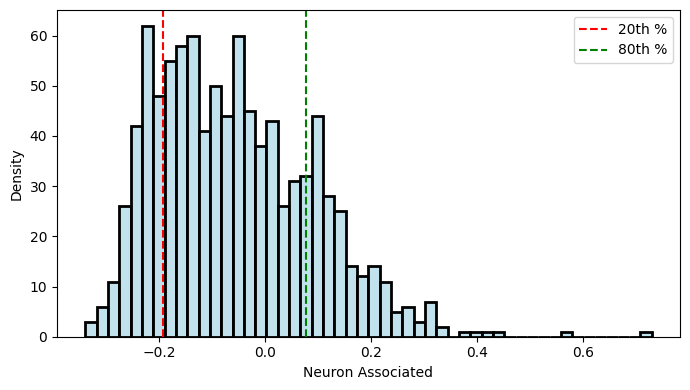

0.07726782989501953


In [13]:
CB_far, CB_gran_assoc = score_and_split_by_percentile_per_age(CB, "CDK2, CXCL2, SLAMF9, ARHGAP5, CTSS, ATP2A3, HLA-A".split(", "), score_name="Neuron Associated", lower=20, upper=80, plot=True,save_pdf = 'full_dataset_human_scores.pdf')

In [14]:
def age_percentage_table(df_1, df_2, age_col='Age'):
    """
    Calculate the percentage of rows in df_1 that are present in df_2, grouped by age.

    Parameters:
        df_1 (pd.DataFrame): The full dataset.
        df_2 (pd.DataFrame): The subset dataset.
        age_col (str): Name of the age column.

    Returns:
        pd.DataFrame: Table with columns: Age, count_in_df1, count_in_df2, percent_in_df2
    """
    # Count occurrences per age
    age_counts_1 = df_1[age_col].value_counts().sort_index()
    age_counts_2 = df_2[age_col].value_counts().sort_index()

    # Combine into DataFrame
    df = pd.DataFrame({
        'count_in_df1': age_counts_1,
        'count_in_df2': age_counts_2
    }).fillna(0)

    # Calculate percentage
    df['percent_in_df2'] = (df['count_in_df2'] / df['count_in_df1']) * 100

    return df.reset_index().rename(columns={'index': age_col})

In [15]:
age_percentage_table(CB.obs, CB_gran_assoc.obs, age_col='Age')

Age  count_in_df1  count_in_df2  percent_in_df2
0   40           317            53       16.719243
1   65           246            49       19.918699
2   67           330            59       17.878788
3   86            65            31       47.692308

/tmp/ipykernel_820494/1918941517.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g, x in CB.obs.groupby("Age_cat"):


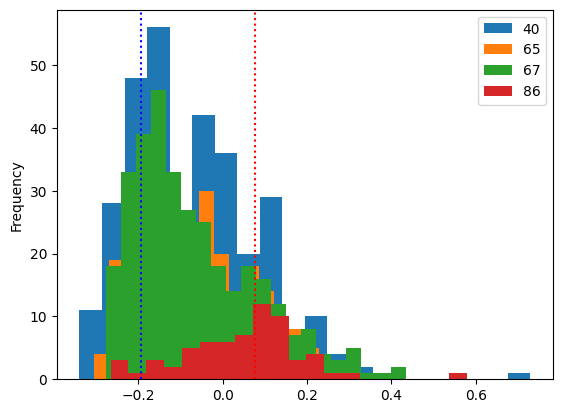

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots()
i=0
for g, x in CB.obs.groupby("Age_cat"):
    x["Neuron Associated"].plot.hist(ax=ax, bins=20, label=g)
    # , color=bwr_color(g, 40, 86)
    i+=1
plt.legend()
ax.axvline(CB.obs["Neuron Associated"].quantile(0.2), color="blue", linestyle=":")
ax.axvline(CB.obs["Neuron Associated"].quantile(0.8), color="red", linestyle=":")


plt.savefig("figures/age_hist_overlaid.pdf")

In [17]:
def violin_temp_categorical(adata, key, groupby, run_stats=False, stripplot=False, **kwargs):
    """
    Wrapper around sc.pl.violin that temporarily converts the groupby column to categorical
    without modifying the original AnnData object. Optionally, it performs pairwise Wilcoxon 
    rank-sum tests between the conditions and produces a strip plot with a regression line 
    and confidence intervals.
    
    Parameters:
        adata (AnnData): Your AnnData object.
        key (str): Key in `.obs` to plot (should be numeric for the regression plot).
        groupby (str): Column in `.obs` to group by (will be treated as categorical).
        run_stats (bool): If True, compute pairwise Wilcoxon rank-sum tests.
        stripplot (bool): If True, create a strip plot with a regression line and confidence intervals.
        kwargs: Other keyword arguments passed to `sc.pl.violin`.
    """
    import pandas as pd
    import itertools
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import ranksums  # using ranksums for the rank-sum test
    
    # Create a shallow copy to avoid modifying the original AnnData
    temp_adata = adata.copy()
    temp_adata.obs[groupby] = pd.Categorical(temp_adata.obs[groupby])
    
    # Plot the violin plot using Scanpy
    sc.pl.violin(temp_adata, keys=key, groupby=groupby, **kwargs)
    
    # Run pairwise statistics if the flag is True
    if run_stats:
        groups = temp_adata.obs[groupby].cat.categories
        stats_results = {}
        for grp1, grp2 in itertools.combinations(groups, 2):
            data1 = temp_adata.obs.loc[temp_adata.obs[groupby] == grp1, key]
            data2 = temp_adata.obs.loc[temp_adata.obs[groupby] == grp2, key]
            stat, p_value = ranksums(data1, data2)
            stats_results[(grp1, grp2)] = {'statistic': stat, 'p-value': p_value}
        
        print("Pairwise Wilcoxon rank-sum test results:")
        for groups_pair, res in stats_results.items():
            print(f"{groups_pair[0]} vs {groups_pair[1]}: statistic = {res['statistic']:.3f}, p-value = {res['p-value']:.3e}")
    
    # Create a strip plot with a regression line if the flag is True
    if stripplot:
        # Ensure the key column is numeric
        if not pd.api.types.is_numeric_dtype(temp_adata.obs[key]):
            print(f"Column '{key}' is not numeric. Regression plot requires numeric data.")
        else:
            # Map categorical groups to numeric codes for regression
            temp_adata.obs['_group_code'] = temp_adata.obs[groupby].cat.codes
        
            # Fit regression using numpy to get the coefficients
            x_vals = temp_adata.obs['_group_code']
            y_vals = temp_adata.obs[key]
            slope, intercept = np.polyfit(x_vals, y_vals, 1)
            equation = f"y = {slope:.2f}x + {intercept:.2f}"

            # Plotting
            plt.figure(figsize=(8, 6))
            sns.stripplot(x=groupby, y=key, data=temp_adata.obs, jitter=True, color='gray', alpha=0.5)
            sns.regplot(x='_group_code', y=key, data=temp_adata.obs, scatter=False, ci=95, color='red', label=equation)

            # Set x-axis ticks to original category labels
            plt.xticks(ticks=range(len(temp_adata.obs[groupby].cat.categories)),
                   labels=temp_adata.obs[groupby].cat.categories)
            plt.xlabel(groupby)
            plt.title("Strip Plot with Best Fit Line and 95% Confidence Interval")
            plt.legend(title="Regression Line", loc="best")
            plt.savefig('strip_with_line.pdf')
            plt.show()

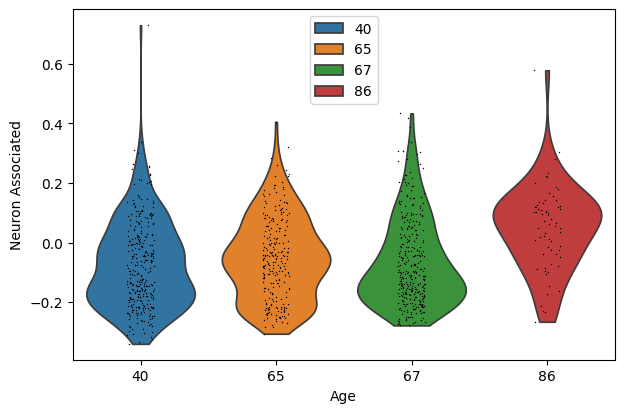

Pairwise Wilcoxon rank-sum test results:
40 vs 65: statistic = -1.889, p-value = 5.892e-02
40 vs 67: statistic = -0.392, p-value = 6.953e-01
40 vs 86: statistic = -6.071, p-value = 1.269e-09
65 vs 67: statistic = 1.713, p-value = 8.675e-02
65 vs 86: statistic = -5.082, p-value = 3.728e-07
67 vs 86: statistic = -5.906, p-value = 3.504e-09


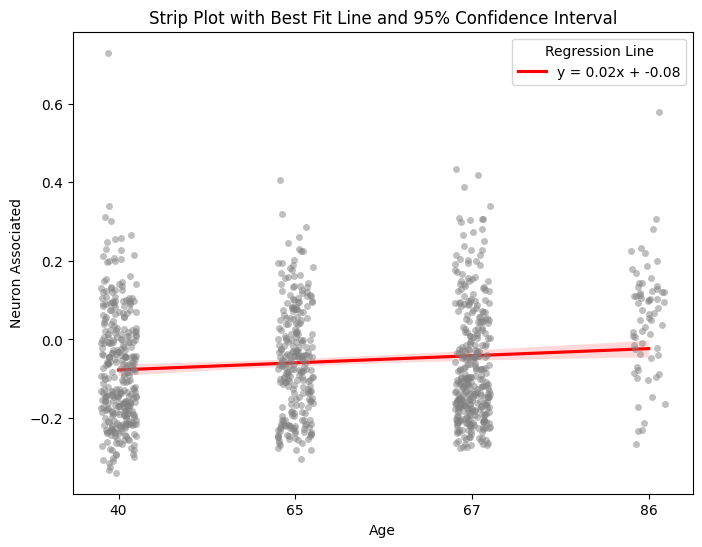

In [18]:
violin_temp_categorical(CB,"Neuron Associated",groupby='Age',run_stats=True,stripplot=True,save='violin_plot.pdf')

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot_by_age_region(adata, score_name, output_pdf_path=None):
    """
    Plot a boxplot of the score split by age and hue'd by region, and optionally save it to a PDF.
    
    Parameters:
    - adata: AnnData object containing the data.
    - score_name: The name of the score to be plotted (must be present in adata.obs).
    - output_pdf_path: Optional. If provided, the plot will be saved to this path as a PDF.
    
    Returns:
    - A boxplot split by 'Age' and hue'd by 'Region', displayed on screen or saved as a PDF.
    """
    # Ensure the score is in adata.obs
    if score_name not in adata.obs.columns:
        raise ValueError(f"{score_name} not found in adata.obs columns.")
    
    # Create a DataFrame from adata.obs with relevant columns
    plot_data = adata.obs[['Age', 'Region', score_name]].copy()
    
    # Plot the boxplot using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plot_data, x='Age', y=score_name, hue='Region')
    
    # Customize plot labels and title
    plt.title(f'Boxplot of {score_name} split by Age and Region')
    plt.xlabel('Age')
    plt.ylabel(f'{score_name} Score')
    plt.legend(title='Region')
    
    # Check if output_pdf_path is provided; if so, save the plot to the PDF
    if output_pdf_path:
        plt.savefig(output_pdf_path, format='pdf')
        print(f"Plot saved to {output_pdf_path}")
    
    # Show the plot
    plt.show()

    # Optionally, close the plot to avoid memory issues if used in a loop or script
    plt.close()

In [20]:
CB_gran_assoc.obs.Age_cat

3345     86
3398     86
3408     86
3417     86
3478     86
         ..
44490    40
44515    40
44532    40
44546    40
44552    40
Name: Age_cat, Length: 192, dtype: category
Categories (4, int64): [40, 65, 67, 86]

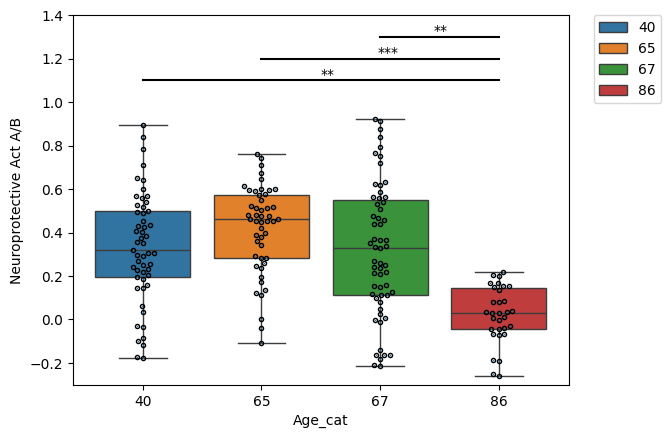

In [21]:
sns.boxplot(
    CB_gran_assoc.obs,
    x="Age_cat",
    y="Neuroprotective Act A/B",
    hue="Age_cat",
    # hue_order=[ "High"],
    order=["40", "65", "67", "86"]
    #palette=[colors[0],colors[1], colors[2], colors[3]]
)

sns.swarmplot(
    CB_gran_assoc.obs,
    x="Age_cat",
    y="Neuroprotective Act A/B",
    #hue="Age_cat",
    order=["40", "65", "67", "86"],
    dodge=True,
    #hue_order=["High"],
    edgecolor="k",
    linewidth=3,
    s=1,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.plot([0, 3], [1.1, 1.1], c="k")
plt.text(1.5, 1.11, "**")

plt.plot([1, 3], [1.2, 1.2], c="k")
plt.text(1.975, 1.21, "***")

plt.plot([2, 3], [1.3, 1.3], c="k")
plt.text(2.45, 1.31, "**")

plt.ylim(-.3, 1.4)

plt.savefig("neuroprotective-act-ab-neuroassociated-group.pdf", bbox_inches="tight")

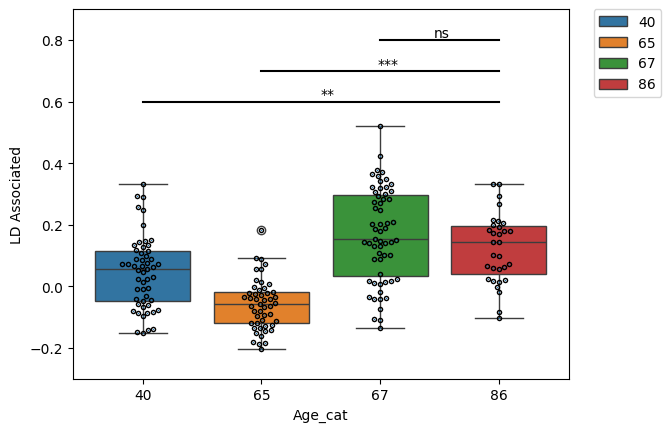

In [22]:
sns.boxplot(
    CB_gran_assoc.obs,
    x="Age_cat",
    y="LD Associated",
    hue="Age_cat",
    # hue_order=[ "High"],
    order=["40", "65", "67", "86"],
    #palette=[colors[0],colors[1], colors[2], colors[3]]
)

sns.swarmplot(
    CB_gran_assoc.obs,
    x="Age_cat",
    y="LD Associated",
    #hue="Age_cat",
    order=["40", "65", "67", "86"],
    dodge=True,
    #hue_order=["High"],
    edgecolor="k",
    linewidth=3,
    s=1,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.plot([0, 3], [0.6, 0.6], c="k")
plt.text(1.5, 0.61, "**")

plt.plot([1, 3], [.7, .7], c="k")
plt.text(1.975, 0.71, "***")

plt.plot([2, 3], [.8, .8], c="k")
plt.text(2.45, 0.81, "ns")

plt.ylim(-.3, .9)

plt.savefig("ld-associated-neuroassociated-group.pdf", bbox_inches="tight")

In [23]:
from adjustText import adjust_text
def shift_log_normalized(adata):
    """
    Shift log-normalized values to be non-negative.
    
    Parameters:
    adata : AnnData
        Annotated data matrix.
    
    Returns:
    AnnData
        AnnData object with shifted log-normalized values.
    """
    adata_copy = adata.copy()
    min_val = adata_copy.X.min()
    if min_val < 0:
        adata_copy.X = adata_copy.X - min_val
    return adata_copy

def differential_expression(adata1, adata2, shift_log_values=False):
    """
    Perform differential expression analysis between two AnnData objects.

    Parameters:
    adata1 : AnnData
        First annotated data matrix.
    adata2 : AnnData
        Second annotated data matrix.
    shift_log_values : bool
        Whether to shift log-normalized values to be non-negative.

    Returns:
    pd.DataFrame
        DataFrame containing differential expression results.
    """
    # Add a column indicating the origin of each cell
    adata1.obs['group'] = 'group1'
    adata2.obs['group'] = 'group2'

    if shift_log_values:
        adata1 = shift_log_normalized(adata1)
        adata2 = shift_log_normalized(adata2)

    # Concatenate the two AnnData objects
    adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['group1', 'group2'])

    # Perform differential expression analysis using Scanpy
    sc.tl.rank_genes_groups(adata_combined, groupby='batch', reference='group1', method='wilcoxon',use_raw=False)

    # Extract results into a DataFrame
    results = adata_combined.uns['rank_genes_groups']
    groups = results['names'].dtype.names
    pvals = pd.DataFrame({group + '_pvals': results['pvals'][group] for group in groups})
    pvals_adj = pd.DataFrame({group + '_pvals_adj': results['pvals_adj'][group] for group in groups})
    logfoldchanges = pd.DataFrame({group + '_logfoldchanges': results['logfoldchanges'][group] for group in groups})
    names = pd.DataFrame({group + '_names': results['names'][group] for group in groups})

    return pd.concat([names, pvals, pvals_adj, logfoldchanges], axis=1)

def plot_volcano(
    df, 
    sig_lfc=0.5, 
    group='group2', 
    pval_col_suffix='_pvals', 
    logfc_col_suffix='_logfoldchanges', 
    name_col_suffix='_names', 
    title='Volcano Plot', 
    xlims=None, 
    savefig=None,
    figsize=(10, 6)
):
    """
    Plot a volcano plot for differential expression analysis results.

    Parameters:
    df : pd.DataFrame
        DataFrame containing differential expression results.
    group : str
        Group name for differential expression results.
    pval_col_suffix : str
        Suffix for the p-value column in the DataFrame.
    logfc_col_suffix : str
        Suffix for the log fold change column in the DataFrame.
    name_col_suffix : str
        Suffix for the gene names column in the DataFrame.
    title : str
        Title for the plot.
    xlims : tuple, optional
        Limits for the x-axis.
    savefig : str, optional
        Path to save the figure.

    Returns:
    list, list
        Two lists containing significant genes with log fold change < 1 and > 1, ordered by log fold change.
    """
    pvals = df[group + pval_col_suffix]
    logfoldchanges = df[group + logfc_col_suffix]
    gene_names = df[group + name_col_suffix]
    
    # Define significance thresholds
    sig_pval = 0.05
    sig_logfc = sig_lfc
    
    # Create the plot
    plt.figure(figsize=figsize)
    plt.scatter(logfoldchanges, -np.log10(pvals), color='grey', alpha=0.5, label='NS')
    
    # Highlight significant points
    sig_points = (pvals < sig_pval) & (np.abs(logfoldchanges) > sig_logfc)
    plt.scatter(logfoldchanges[sig_points], -np.log10(pvals[sig_points]), color='red', alpha=0.50, label='P-value and log2 FC')
    plt.scatter(logfoldchanges[(pvals < sig_pval) & ~sig_points], -np.log10(pvals[(pvals < sig_pval) & ~sig_points]), color='blue', alpha=0.50, label='P-value')
    plt.scatter(logfoldchanges[~(pvals < sig_pval) & (np.abs(logfoldchanges) > sig_logfc)], -np.log10(pvals[~(pvals < sig_pval) & (np.abs(logfoldchanges) > sig_logfc)]), color='green', alpha=0.50, label='Log2 FC')
    
    plt.axhline(y=-np.log10(sig_pval), color='black', linestyle='--')
    plt.axvline(x=sig_logfc, color='black', linestyle='--')
    plt.axvline(x=-sig_logfc, color='black', linestyle='--')
    
    # Annotate significant genes
    texts = []
    sig_genes_less_than_1 = []  # List for significant genes with logFC < -1
    sig_genes_greater_than_1 = []  # List for significant genes with logFC > 1
    
    if len(sig_points) > 100:

        for i in range(len(gene_names)):
            if sig_points[i]:
                if logfoldchanges[i] < -1 * sig_lfc:
                    sig_genes_less_than_1.append((gene_names[i], logfoldchanges[i]))  # Store the gene and its logFC
                elif logfoldchanges[i] > sig_lfc:
                    sig_genes_greater_than_1.append((gene_names[i], logfoldchanges[i]))  # Store the gene and its logFC
                
                if i < 100:
                    texts.append(plt.text(logfoldchanges[i], -np.log10(pvals[i]), gene_names[i], fontsize=8))
                
                if i > 100:
                    pass
    else: 
        for i in range(len(gene_names)):
            if sig_points[i]:
                if logfoldchanges[i] < -1 * sig_lfc:
                    sig_genes_less_than_1.append((gene_names[i], logfoldchanges[i]))  # Store the gene and its logFC
                elif logfoldchanges[i] > sig_lfc:
                    sig_genes_greater_than_1.append((gene_names[i], logfoldchanges[i]))  # Store the gene and its logFC

                texts.append(plt.text(logfoldchanges[i], -np.log10(pvals[i]), gene_names[i], fontsize=8))
    
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))
    
    plt.xlabel('Log2 fold change')
    plt.ylabel('-Log10 P-value')
    plt.title(title)
    plt.legend(loc='best')
    
    if xlims is not None:
        plt.xlim(xlims)
        
    if savefig is not None:
        plt.savefig(savefig, format='pdf')
        
    plt.show()
    
    # Sort the lists by the absolute value of log fold change
    sig_genes_less_than_1 = sorted(sig_genes_less_than_1, key=lambda x: abs(x[1]), reverse=True)
    sig_genes_greater_than_1 = sorted(sig_genes_greater_than_1, key=lambda x: abs(x[1]), reverse=True)

    # Extract only the gene names after sorting
    sig_genes_less_than_1 = [gene for gene, logfc in sig_genes_less_than_1]
    sig_genes_greater_than_1 = [gene for gene, logfc in sig_genes_greater_than_1]
    
    return sig_genes_less_than_1, sig_genes_greater_than_1

In [24]:
#HP_gran_assoc.X = HP_gran_assoc.layers['normalized'].copy()
#CB_gran_assoc.X = CB_gran_assoc.layers['normalized'].copy()

/tmp/ipykernel_820494/3008242717.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['group'] = 'group1'
/tmp/ipykernel_820494/3008242717.py:38: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['group'] = 'group2'
/tmp/ipykernel_820494/3008242717.py:45: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['group1', 'group2'])


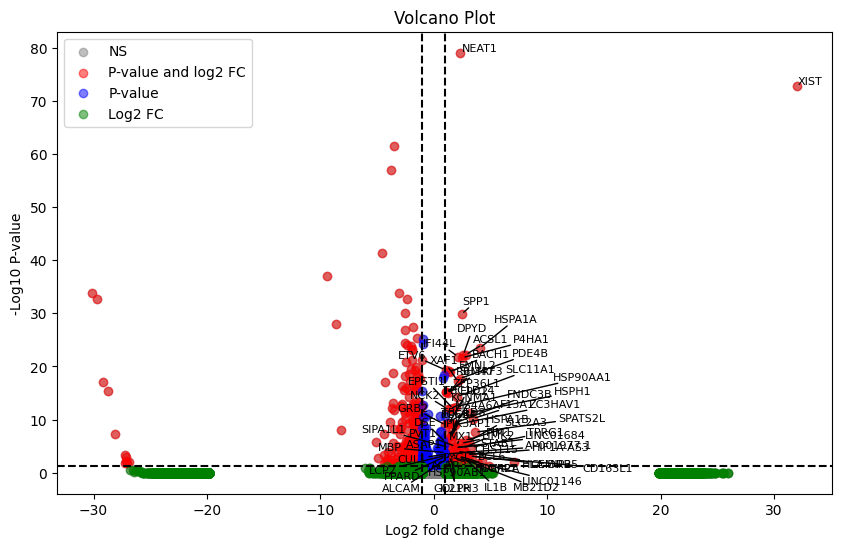

In [25]:
df_assoc = differential_expression(CB[CB.obs.Age == 40], CB[CB.obs.Age ==67])
CB_young, CB_old = plot_volcano(df_assoc, pval_col_suffix='_pvals_adj',sig_lfc=1)

/tmp/ipykernel_820494/3008242717.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['group'] = 'group1'
/tmp/ipykernel_820494/3008242717.py:38: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['group'] = 'group2'
/tmp/ipykernel_820494/3008242717.py:45: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['group1', 'group2'])


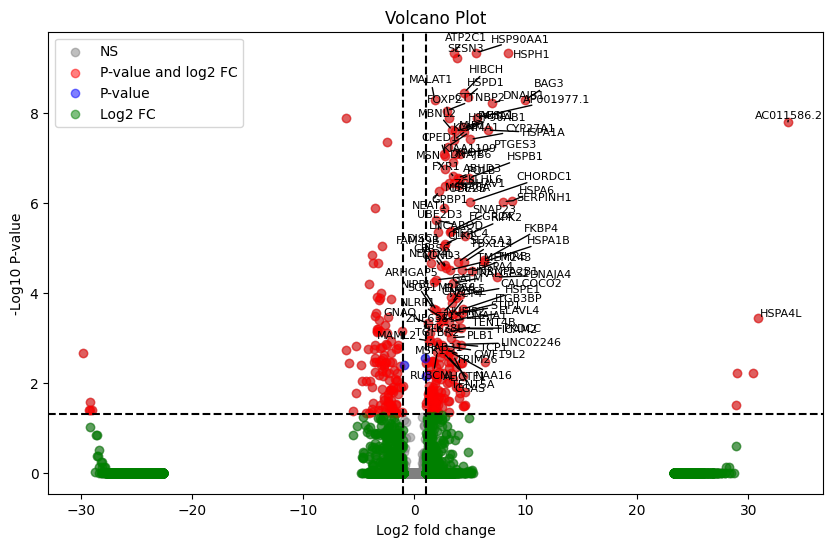

/tmp/ipykernel_820494/3008242717.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['group'] = 'group1'
/tmp/ipykernel_820494/3008242717.py:38: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['group'] = 'group2'
/tmp/ipykernel_820494/3008242717.py:45: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['group1', 'group2'])


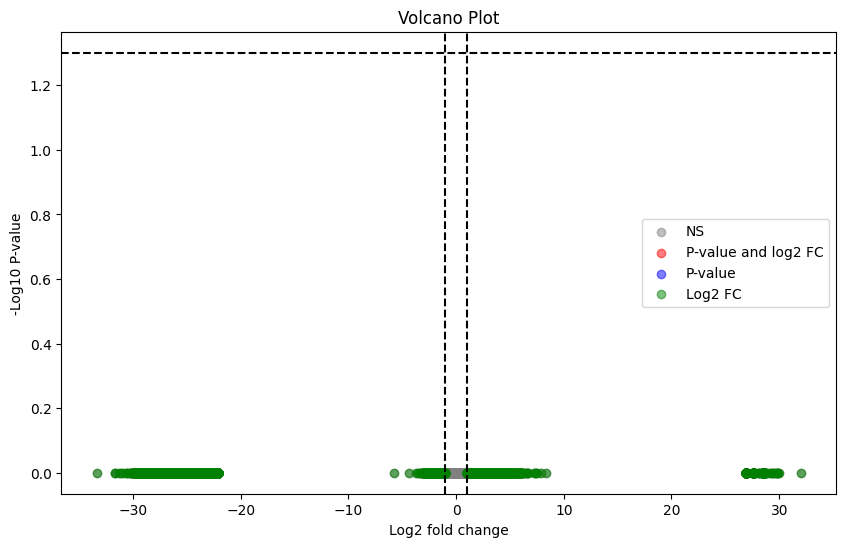

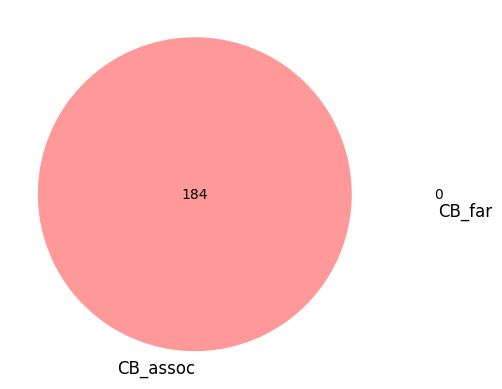

In [26]:
df_assoc = differential_expression(CB_gran_assoc[CB_gran_assoc.obs.Age == 40], CB_gran_assoc[CB_gran_assoc.obs.Age > 80])
CB_young_assoc_genes, CB_old_assoc_genes = plot_volcano(df_assoc, pval_col_suffix='_pvals_adj',sig_lfc=1)


df_far = differential_expression(CB_far[CB_far.obs.Age == 40], CB_far[CB_far.obs.Age > 80])
CB_young_far_genes, CB_old_far_genes = plot_volcano(df_far, pval_col_suffix='_pvals_adj',sig_lfc=1)

from matplotlib_venn import venn2
venn = venn2([set(CB_old_assoc_genes), set(CB_old_far_genes)], ('CB_assoc', 'CB_far'))
plt.savefig('venn_diagram_oldest.pdf')
plt.show()

oldest_assoc = set(CB_old_assoc_genes) - set(CB_old_far_genes)

oldest_far = set(CB_old_far_genes) - set(CB_old_assoc_genes)

/tmp/ipykernel_820494/3008242717.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['group'] = 'group1'
/tmp/ipykernel_820494/3008242717.py:38: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['group'] = 'group2'
/tmp/ipykernel_820494/3008242717.py:45: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['group1', 'group2'])


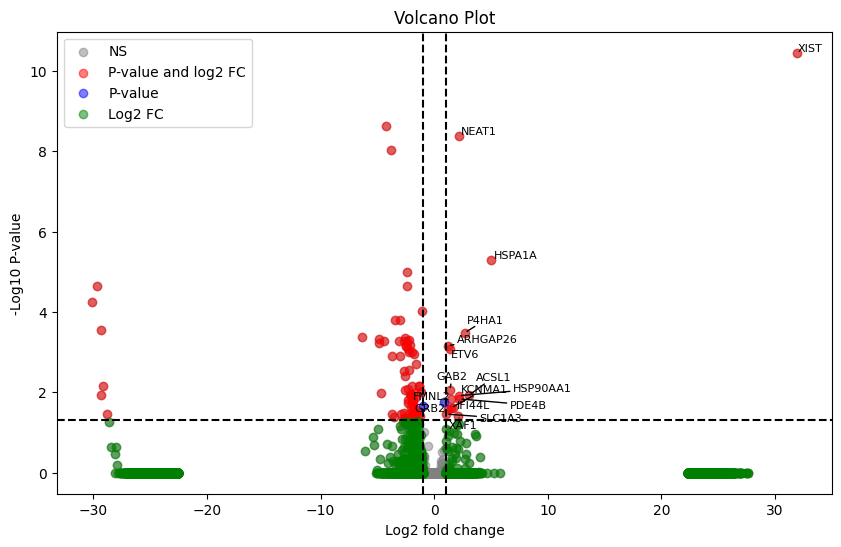

/tmp/ipykernel_820494/3008242717.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['group'] = 'group1'
/tmp/ipykernel_820494/3008242717.py:38: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['group'] = 'group2'
/tmp/ipykernel_820494/3008242717.py:45: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['group1', 'group2'])


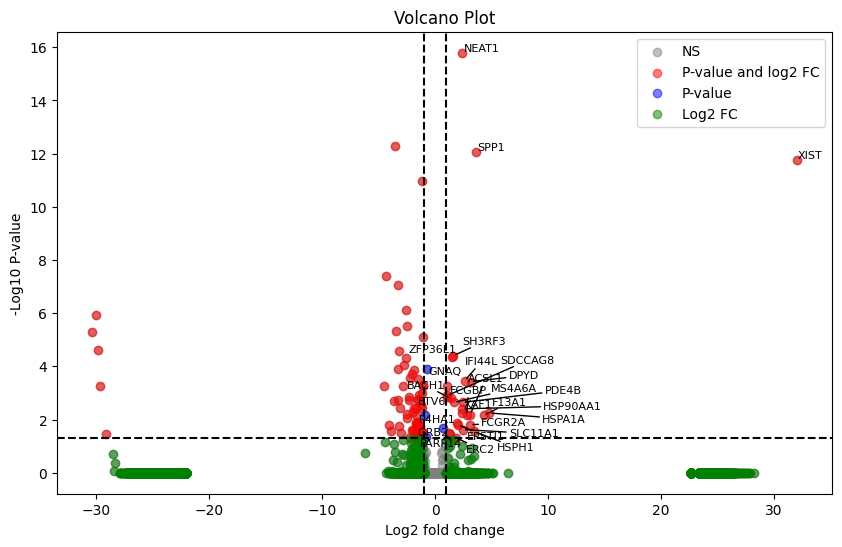

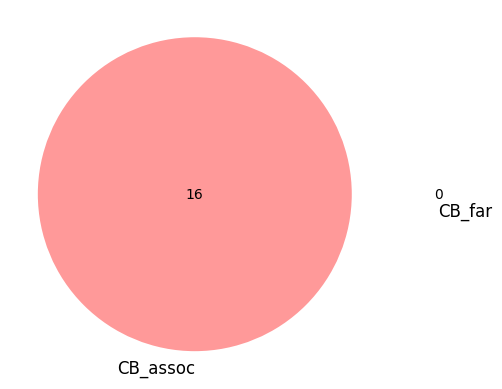

In [27]:
df_assoc_2 = differential_expression(CB_gran_assoc[CB_gran_assoc.obs.Age == 40], CB_gran_assoc[CB_gran_assoc.obs.Age.isin([67])])
CB_young_assoc_genes, CB_old_assoc_genes_2 = plot_volcano(df_assoc_2, pval_col_suffix='_pvals_adj',sig_lfc=1)


df_far_2 = differential_expression(CB_far[CB_far.obs.Age == 40], CB_far[CB_far.obs.Age.isin([67])])
CB_young_far_genes, CB_old_far_genes_2 = plot_volcano(df_far_2, pval_col_suffix='_pvals_adj',sig_lfc=1)

from matplotlib_venn import venn2
venn = venn2([set(CB_old_assoc_genes_2), set(CB_old_far_genes)], ('CB_assoc', 'CB_far'))
plt.show()

second_assoc = set(CB_old_assoc_genes_2) - set(CB_old_far_genes)
second_far = set(CB_old_far_genes) - set(CB_old_assoc_genes_2)

/tmp/ipykernel_820494/3008242717.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['group'] = 'group1'
/tmp/ipykernel_820494/3008242717.py:38: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['group'] = 'group2'
/tmp/ipykernel_820494/3008242717.py:45: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['group1', 'group2'])


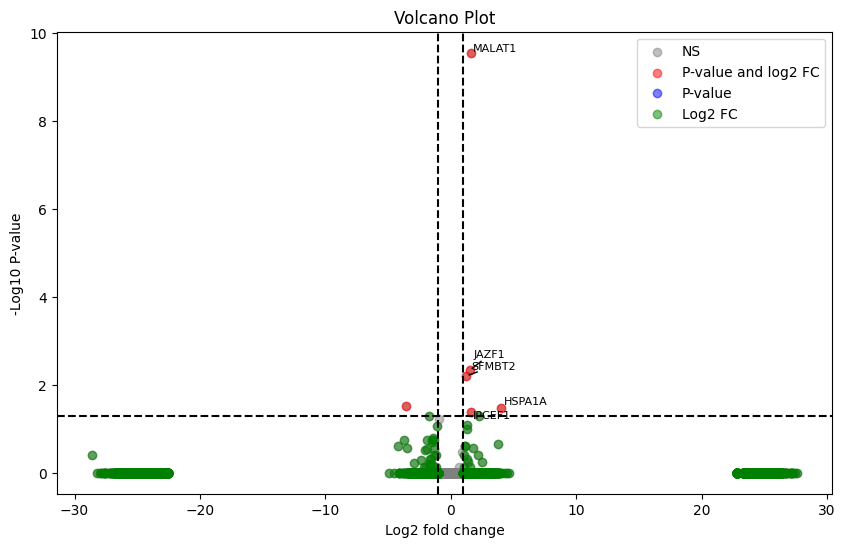

/tmp/ipykernel_820494/3008242717.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['group'] = 'group1'
/tmp/ipykernel_820494/3008242717.py:38: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['group'] = 'group2'
/tmp/ipykernel_820494/3008242717.py:45: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['group1', 'group2'])


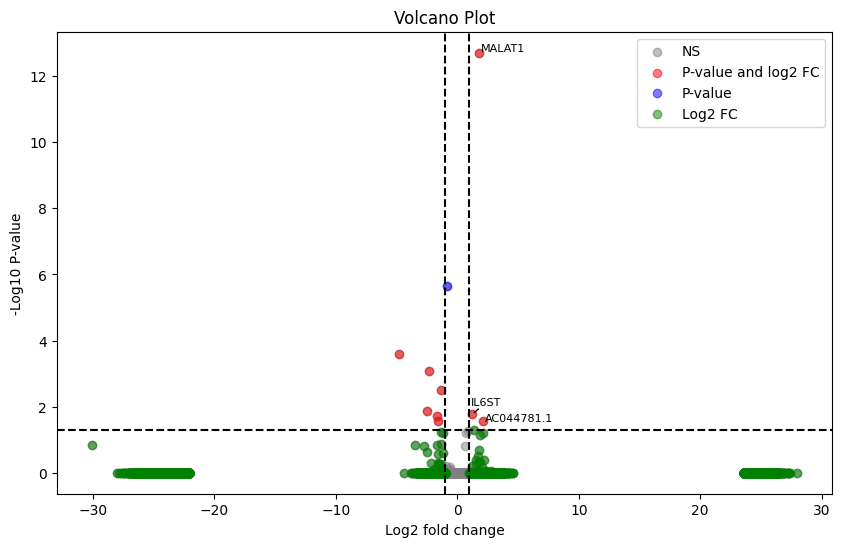

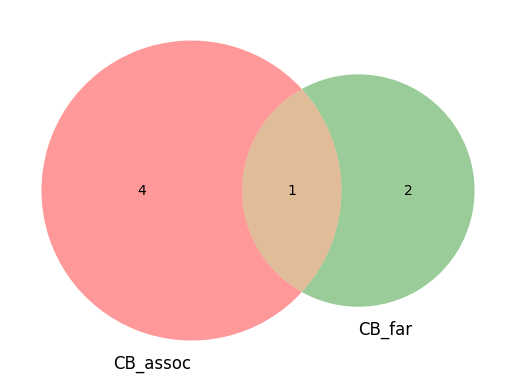

In [28]:
df_assoc_3 = differential_expression(CB_gran_assoc[CB_gran_assoc.obs.Age == 40], CB_gran_assoc[CB_gran_assoc.obs.Age == 65])
CB_young_assoc_genes, CB_old_assoc_genes_3 = plot_volcano(df_assoc_3, pval_col_suffix='_pvals_adj',sig_lfc=1)


df_far_3 = differential_expression(CB_far[CB_far.obs.Age == 40], CB_far[CB_far.obs.Age == 65])
CB_young_far_genes, CB_old_far_genes = plot_volcano(df_far_3, pval_col_suffix='_pvals_adj',sig_lfc=1)

from matplotlib_venn import venn2
venn = venn2([set(CB_old_assoc_genes_3), set(CB_old_far_genes)], ('CB_assoc', 'CB_far'))
plt.show()

third_assoc = set(CB_old_assoc_genes_3) - set(CB_old_far_genes)

third_far = set(CB_old_far_genes) - set(CB_old_assoc_genes_3)

In [29]:
df_assoc[(df_assoc.group2_pvals_adj < 0.05) & (df_assoc.group2_logfoldchanges > 1) & (df_assoc.group2_logfoldchanges < 10)].group2_logfoldchanges.mean()

3.0501807

In [30]:
df_assoc_2[(df_assoc_2.group2_pvals_adj < 0.05) & (df_assoc_2.group2_logfoldchanges > 1)& (df_assoc_2.group2_logfoldchanges < 10)].group2_logfoldchanges.mean()

2.0186143

In [31]:
df_assoc_3[(df_assoc_3.group2_pvals_adj < 0.05) & (df_assoc_3.group2_logfoldchanges > 1)& (df_assoc_3.group2_logfoldchanges < 10)].group2_logfoldchanges.mean()

2.0025353

In [32]:
oldest_assoc = (set(CB_old_assoc_genes) - set(CB_old_assoc_genes_2)) - set(CB_old_assoc_genes_3)

/home/doug.henze/.conda/envs/Vizgen_2/lib/python3.9/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/doug.henze/.conda/envs/Vizgen_2/lib/python3.9/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/tmp/ipykernel_820494/4250835968.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate al

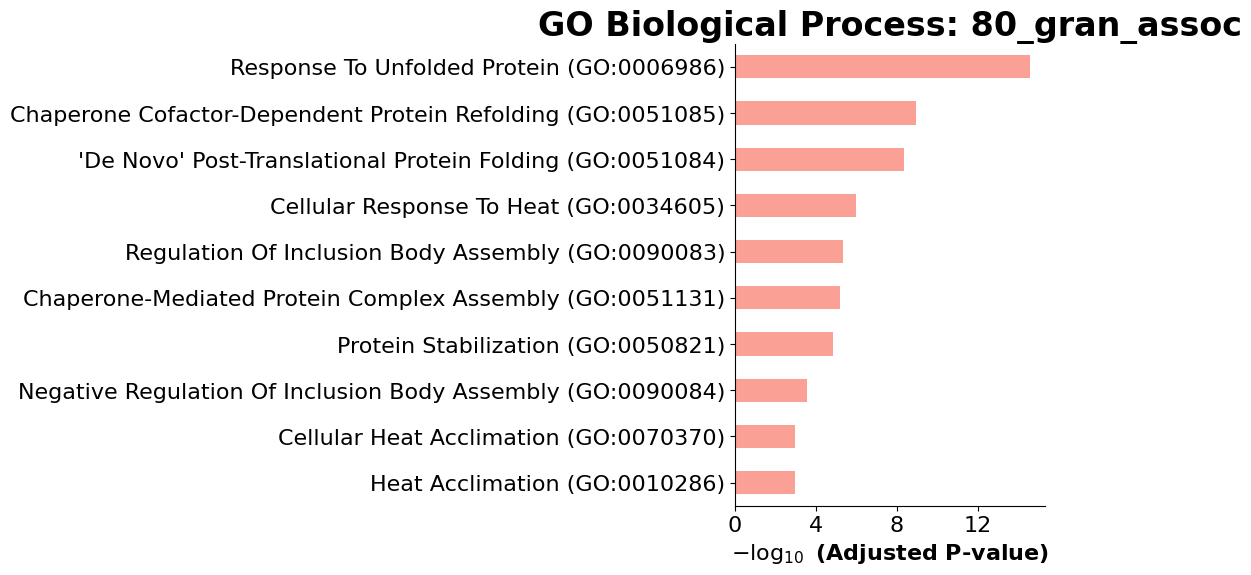

In [33]:
import gseapy as gp
import matplotlib.pyplot as plt

# Replace with your gene list
gene_list = list(CB_old_assoc_genes)

# Run enrichment using Enrichr
enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=["GO_Biological_Process_2023"],
    organism='Human',
    outdir=None,
    cutoff=0.05
)

# Plot the top 10 enriched terms using GSEApy's native barplot
gp.barplot(enr.results, title='GO Biological Process: 80_gran_assoc', cutoff=0.05, top_term=10)
plt.tight_layout()
plt.savefig('figures/go_old.pdf')
plt.show()

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from itertools import combinations

def compare_effect_sizes(dataframes, labels=None, pval_thresh=0.05, logfc_thresh=1, title="DEG Effect Size Comparison", return_stats=False):
    """
    Compare effect sizes (log2FC) across multiple DE result dataframes.

    Parameters:
        dataframes (list of pd.DataFrame): DataFrames with 'group2_logfoldchanges' and 'group2_pvals_adj' columns.
        labels (list of str): Optional list of names corresponding to the dataframes.
        pval_thresh (float): Adjusted p-value threshold for significance.
        logfc_thresh (float): Log2FC threshold for filtering.
        title (str): Plot title.
        return_stats (bool): If True, return a DataFrame of pairwise stats.

    Returns:
        stats_df (optional): DataFrame of pairwise Mann-Whitney U test results.
    """
    if labels is None:
        labels = [f"df{i+1}" for i in range(len(dataframes))]

    # Combine all significant log2FCs into one DataFrame
    all_data = []
    for df, label in zip(dataframes, labels):
        sig_fc = df[(df.group2_pvals_adj < pval_thresh) & (df.group2_logfoldchanges > logfc_thresh) & (df.group2_logfoldchanges < 20)].group2_logfoldchanges
        tmp_df = pd.DataFrame({'log2FC': sig_fc, 'dataset': label})
        all_data.append(tmp_df)

    df_plot = pd.concat(all_data, ignore_index=True)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_plot, x='dataset', y='log2FC', whis=1.5, fliersize=0, palette='Set2')
    sns.stripplot(data=df_plot, x='dataset', y='log2FC', color='black', alpha=0.5, jitter=True)
    plt.title(title)
    plt.ylabel("log2 Fold Change")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('figures/effect_size.pdf',format='pdf')
    plt.show()

    # Pairwise Mann-Whitney U tests
    stats = []
    for (i, j) in combinations(range(len(dataframes)), 2):
        df1 = df_plot[df_plot['dataset'] == labels[i]]['log2FC']
        df2 = df_plot[df_plot['dataset'] == labels[j]]['log2FC']
        stat, pval = mannwhitneyu(df1, df2, alternative='two-sided')
        stats.append({
            'comparison': f"{labels[i]} vs {labels[j]}",
            'U_statistic': stat,
            'p_value': pval
        })

    stats_df = pd.DataFrame(stats)
    print("\nMann-Whitney U Test Results:")
    print(stats_df.to_string(index=False))

    if return_stats:
        return stats_df

/tmp/ipykernel_820494/342517078.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='dataset', y='log2FC', whis=1.5, fliersize=0, palette='Set2')


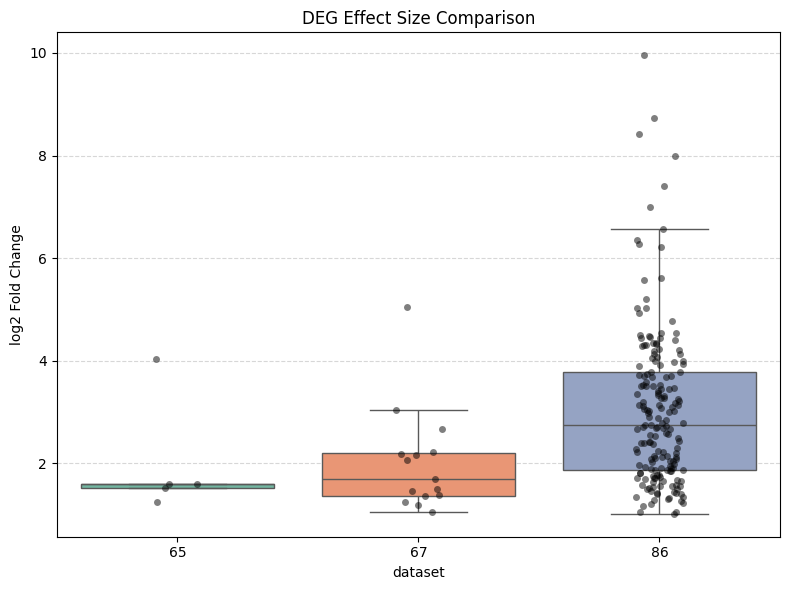


Mann-Whitney U Test Results:
comparison  U_statistic  p_value
  65 vs 67         37.0 1.000000
  65 vs 86        222.0 0.053575
  67 vs 86        707.0 0.002366


comparison  U_statistic   p_value
0   65 vs 67         37.0  1.000000
1   65 vs 86        222.0  0.053575
2   67 vs 86        707.0  0.002366

In [35]:
compare_effect_sizes([df_assoc_3, df_assoc_2, df_assoc], labels=['65', '67', '86'],return_stats=True)

In [36]:
up_genes = set(df_assoc[(df_assoc.group2_pvals_adj < 0.05) & (df_assoc.group2_logfoldchanges > 1) & (df_assoc.group2_logfoldchanges < 10)].head(15).group2_names.tolist()) - set(['MALAT1','AP001977.1','HSP90AA1'])
down_genes = set(df_assoc[(df_assoc.group2_pvals_adj < 0.05) & (df_assoc.group2_logfoldchanges < -1) & (df_assoc.group2_logfoldchanges > -10)].sort_values('group2_logfoldchanges').head(10).group2_names.tolist()) - set(['LINC01268','AL592183.1','LINC02649','AC008691.1'])
desired = ['ACSL1','DPYD','FMN1','MYO5A','SPP1','CD74','GRID2','CX3CR1']


up_genes = [i for i in up_genes]
down_genes = [i for i in down_genes]

full_list = up_genes + down_genes + desired

full_list = [i for i in set(full_list)]

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

def plot_gene_age_heatmap(adata, gene_list, age_col='Age', figsize=(10, 6), cmap='vlag', scale_axis=1):
    """
    Plots a heatmap of z-scored gene expression across ages.

    Parameters:
        adata (AnnData): The input AnnData object.
        gene_list (list): List of gene names (must exist in adata.var_names).
        age_col (str): Column in adata.obs that contains age information.
        figsize (tuple): Size of the heatmap.
        cmap (str): Colormap to use.
        scale_axis (int): Axis for z-score: 0 = per-age, 1 = per-gene (default).
    """
    # Filter for valid genes
    valid_genes = [g for g in gene_list if g in adata.var_names]
    if not valid_genes:
        raise ValueError("None of the genes are in adata.var_names")

    # Extract expression matrix for selected genes
    expr = adata[:, valid_genes].to_df()

    # Add age metadata
    expr[age_col] = adata.obs[age_col].values

    # Average expression per gene per age group
    expr_grouped = expr.groupby(age_col).mean().T  # genes x age

    # Z-score across genes or age groups
    expr_z = expr_grouped.apply(zscore, axis=scale_axis)

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.clustermap(expr_z, cmap=cmap, center=0, xticklabels=True, yticklabels=True, linewidths=0.3, cbar_kws={'label': 'Z-score'})
    plt.title('Z-scored Gene Expression by Age')
    plt.xlabel('Age')
    plt.ylabel('Gene')
    plt.tight_layout()
    plt.savefig('figures/final_heatmap.pdf',format='pdf')
    plt.show()

<Figure size 1000x600 with 0 Axes>

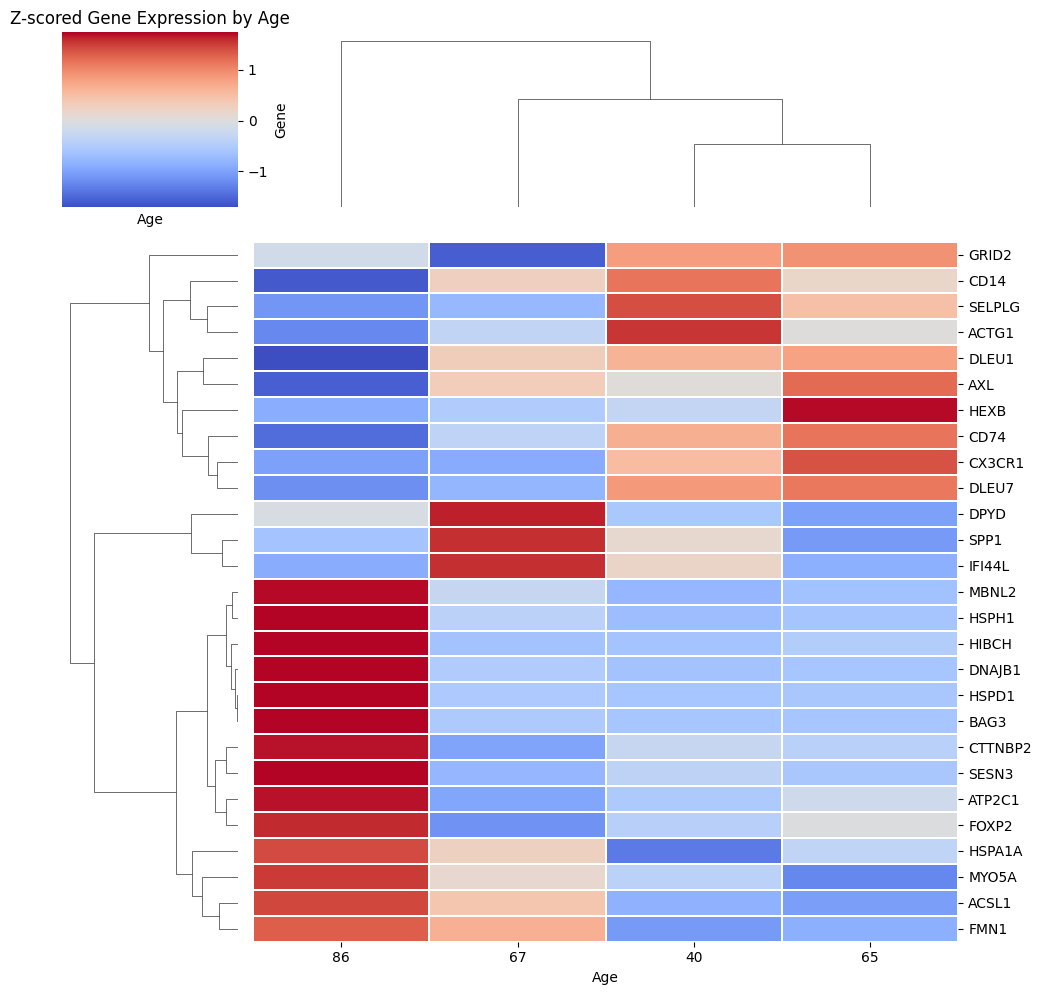

In [38]:
plot_gene_age_heatmap(CB_gran_assoc, full_list + ['AXL','HEXB'], age_col='Age', figsize=(10, 6), cmap='coolwarm', scale_axis=1)